In [1]:
import tensorflow as tf

In [2]:
n_inputs = 3
n_hidden = 2
n_outputs = n_inputs

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

reconstrunction_loss = tf.reduce_mean(tf.square(outputs - X))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstrunction_loss)
init = tf.global_variables_initializer()


In [3]:
X_train, X_test = [[1,2,3]], [[4,5,6]]

n_iterations = 1000
codings = hidden

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_test})
    o_test = outputs.eval(feed_dict={X: X_test})

In [4]:
from functools import partial

In [5]:
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 150
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = .01
l2_reg = .0001

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
he_init = tf.contrib.layers.variance_scaling_initializer()
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer = partial(tf.layers.dense,
                         activation=tf.nn.elu,
                         kernel_initializer=he_init,
                         kernel_regularizer=l2_regularizer)

hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)
outputs = my_dense_layer(hidden3, n_outputs, activation=None)

reconstrucation_loss = tf.reduce_mean(tf.square(outputs-X))
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)

loss = tf.add_n([reconstrucation_loss] + reg_losses)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("../chapter_14/data/")

Extracting ../chapter_14/data/train-images-idx3-ubyte.gz
Extracting ../chapter_14/data/train-labels-idx1-ubyte.gz
Extracting ../chapter_14/data/t10k-images-idx3-ubyte.gz
Extracting ../chapter_14/data/t10k-labels-idx1-ubyte.gz


In [7]:
n_epochs = 5
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
            
    test_output = outputs.eval(feed_dict={X: mnist.test.images})

In [8]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

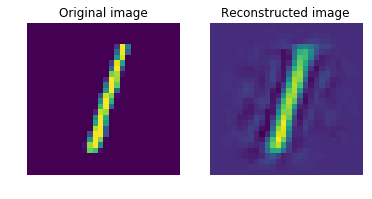

In [9]:
fig, axs = plt.subplots(ncols=2)

axs[0].set_title('Original image')
axs[0].imshow(mnist.test.images[2].reshape((28, 28)))
axs[0].axis('off') 

axs[1].set_title('Reconstructed image')
axs[1].imshow(test_output[2].reshape((28, 28)))
axs[1].axis('off')
plt.show()

In [10]:
tf.reset_default_graph()

activation = tf.nn.elu
regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
initializer = tf.contrib.layers.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

weights1_init = initializer([n_inputs, n_hidden1])
weights2_init = initializer([n_hidden1, n_hidden2])

weights1 = tf.Variable(weights1_init, dtype=tf.float32, name="weights1")
weights2 = tf.Variable(weights2_init, dtype=tf.float32, name="weights2")
weights3 = tf.transpose(weights2, name="weights3")
weights4 = tf.transpose(weights1, name="weights4")

biases1 = tf.Variable(tf.zeros(n_hidden1), name="biases1")
biases2 = tf.Variable(tf.zeros(n_hidden2), name="biases2")
biases3 = tf.Variable(tf.zeros(n_hidden3), name="biases3")
biases4 = tf.Variable(tf.zeros(n_outputs), name="biases4")

hidden1 = activation(tf.matmul(X, weights1) + biases1)
hidden2 = activation(tf.matmul(hidden1, weights2) + biases2)
hidden3 = activation(tf.matmul(hidden2, weights3) + biases3)
outputs = tf.matmul(hidden3, weights4) + biases4

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))
reg_loss = regularizer(weights1) + regularizer(weights2)
loss = reconstruction_loss + reg_loss

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [18]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
            
    test_output = outputs.eval(feed_dict={X: [mnist.test.images[2]]})
    weights1_val = weights1.eval()
    weights2_val = weights2.eval()
    weights3_val = weights3.eval()
    weights4_val = weights4.eval()

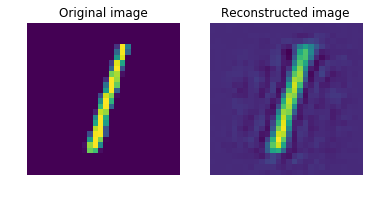

In [13]:
fig, axs = plt.subplots(ncols=2)

axs[0].set_title('Original image')
axs[0].imshow(mnist.test.images[2].reshape((28, 28)))
axs[0].axis('off') 

axs[1].set_title('Reconstructed image')
axs[1].imshow(test_output.reshape((28, 28)))
axs[1].axis('off')
plt.show()

In [14]:
def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")

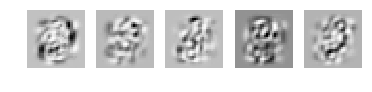

In [47]:
import numpy as np

for i in range(5):
    plt.subplot(2,5,i + 1)
    plot_image(weights1_val.T[i])